# Block 5 Exercise 1: Classification

## MNIST Data
In these exercises we are using the MNIST data set on handwritten digits to compare supervised classification algorithms...   

In [1]:
#imports 
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import fetch_openml

In [2]:
# Load data from https://www.openml.org/d/554
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)


In [3]:
#the full MNIST data set contains 70k samples of digits 0-9 as 28*28 gray scale images (represented as 784 dim vectors)
np.shape(X)

(70000, 784)

### E1.1: Use SkLearn methods to split the MNIST data into random train and test sets. Use 60k samples for training.  


In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=10000, random_state=42)
y_test

array(['8', '4', '8', ..., '3', '8', '3'], dtype=object)

### E1.2: Visualize the data.
* Plot some data samples as images (use https://matplotlib.org/3.1.0/api/_as_gen/matplotlib.pyplot.imshow.html)

'3'

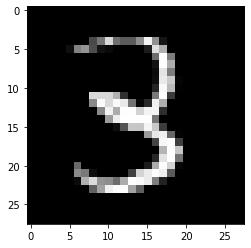

In [8]:
plt.imshow(np.reshape(X_train[8,:], [28, 28]), cmap='gray')
y_train[8]

### E1.3: Train models on the train data.
Train the following models with default parameters on the train data.
* [Naive Bayes](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html#sklearn.naive_bayes.GaussianNB) (assuming a Gaussian distribution of the data)
* [Simple linear model](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html#sklearn.linear_model.SGDClassifier)
   * use ``loss='log'`` to reproduce our logistic loss function 
* [Random Forest](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier)

Compare the training accuracy (https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html#sklearn.metrics.accuracy_score) and [confusion matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html#sklearn.metrics.confusion_matrix) for all three models.

In [6]:
%%time

from sklearn.naive_bayes import GaussianNB
NB = GaussianNB()
NB.fit(X_train, y_train)

Wall time: 1.01 s


GaussianNB()

In [7]:
i = 24
print([y_test[i],  NB.predict([X_test[i, :]])])

['6', array(['6'], dtype='<U1')]


In [8]:
%%time
NBRes = NB.predict(X_test)

Wall time: 972 ms


In [9]:
%%time

from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

slm = make_pipeline(StandardScaler(), SGDClassifier(max_iter=1000, tol=1e-3, loss='log', n_jobs=-1))
slm.fit(X_train, y_train)

i = 0
print([y_test[i],  slm.predict([X_test[i, :]])])

['8', array(['8'], dtype='<U1')]
Wall time: 2min 35s


['5', array(['3'], dtype='<U1')]


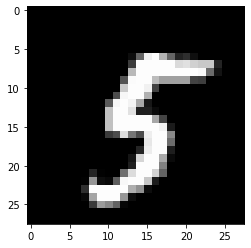

In [63]:
i = 567
i = 7627
i = 65
print([y_test[i],  slm.predict([X_test[i, :]])])
plt.imshow(np.reshape(X_test[i,:], [28, 28]), cmap='gray')


In [11]:
%%time
slmRes = slm.predict(X_test)

Wall time: 88 ms


In [12]:
%%time

from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

rf = RandomForestClassifier(max_depth=5, random_state=0)
rf.fit(X_train, y_train)

Wall time: 15 s


RandomForestClassifier(max_depth=5, random_state=0)

In [13]:
i = 0
print([y_test[i],  rf.predict([X_test[i, :]])])

['8', array(['8'], dtype=object)]


In [14]:
%%time
rfRes = rf.predict(X_test)

Wall time: 234 ms


df['purchase'].astype(int)### E1.4: Evaluate and compare the models on the test set.
* compute the test [accuracy](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html#sklearn.metrics.accuracy_score) 
* compute the [F-Measure](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html#sklearn.metrics.f1_score)
* plot a [ROC curves](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve) for the class "5" for all three models.
                          

In [15]:
from sklearn.metrics import accuracy_score

NBaccuracy = accuracy_score(y_test, NBRes, )
NBaccuracy

0.5604

In [16]:
slmaccuracy = accuracy_score(y_test, slmRes)
slmaccuracy

0.8991

In [17]:
rfaccuracy = accuracy_score(y_test, rfRes)
rfaccuracy

0.8587

In [18]:
from sklearn.metrics import f1_score

NBf1 = f1_score(y_test, NBRes, average=None)
NBf1

array([0.8032345 , 0.88115246, 0.45502646, 0.48121292, 0.24265403,
       0.0952381 , 0.76315789, 0.44157706, 0.38365194, 0.54530248])

In [19]:
slmf1 = f1_score(y_test, slmRes, average=None)
slmf1

array([0.96369295, 0.96455142, 0.90478695, 0.88003982, 0.90826727,
       0.8505618 , 0.94086866, 0.92940039, 0.76870163, 0.89141165])

In [20]:
rff1 = f1_score(y_test, slmRes, average=None)
rff1

array([0.96369295, 0.96455142, 0.90478695, 0.88003982, 0.90826727,
       0.8505618 , 0.94086866, 0.92940039, 0.76870163, 0.89141165])

Text(0.5, 0, 'False Poritive Rate')

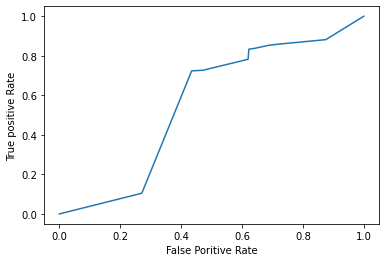

In [21]:
from sklearn import metrics

fpr, tpr, thresholds = metrics.roc_curve(y_test.astype(int), NBRes.astype(int), pos_label=5)

plt.plot(fpr, tpr)
plt.ylabel('True positive Rate')
plt.xlabel('False Poritive Rate')

Text(0.5, 0, 'False Poritive Rate')

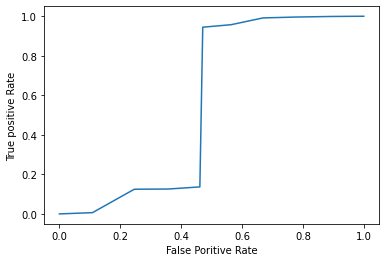

In [22]:
fpr, tpr, thresholds = metrics.roc_curve(y_test.astype(int), slmRes.astype(int), pos_label=5)

plt.plot(fpr, tpr)
plt.ylabel('True positive Rate')
plt.xlabel('False Poritive Rate')

Text(0.5, 0, 'False Poritive Rate')

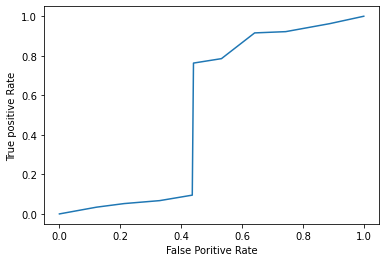

In [23]:
fpr, tpr, thresholds = metrics.roc_curve(y_test.astype(int), rfRes.astype(int), pos_label=5)

plt.plot(fpr, tpr)
plt.ylabel('True positive Rate')
plt.xlabel('False Poritive Rate')